# Building machine learning model for spam classifier for text message

## load all the required libraries

In [1]:
import numpy as np
import pandas as pd
import re
import spacy as sp
import nltk as nl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

## load english model for spacy

In [2]:
nlp = sp.load("en_core_web_sm")

## read the raw data

In [8]:
df = pd.read_table(r"C:\Users\Puran Prakash Sinha\Desktop\Data Science\Python\NLP\spam1.txt",names=["labels","message"])
df.head(2)

C:\Users\Puran Prakash Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
df = pd.read_csv(r"C:\Users\Puran Prakash Sinha\Desktop\Data Science\Python\NLP\spam1.txt",sep="\t",names=["labels","message"])
df.head(2)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


## Analyze the data

In [10]:
df.shape

(5572, 2)

In [11]:
df.message[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

## Perform preprocessing on raw data and apply function over message
- make lower
- remove special chars
- create nlp object
- remove stop words and punctuation using list comprehension
- remove spaces again
- convert to sentence again by joining the words
- Remove bigger spaces which got created after joining
- return the clean sentence


In [12]:
def textPreprocessor(msg):
    msg = msg.lower()
    msg = re.sub("[^\w]"," ",msg)
    obj = nlp(msg)
    msg_wo_sw_pun = [wd.text for wd in obj if wd.is_stop == False and wd.is_punct == False]
    sent = " ".join(msg_wo_sw_pun)
    clean_sent = re.sub("\s+"," ",sent)
    return clean_sent
# textPreprocessor(df.message[200])

In [13]:
df.message = df.message.apply(textPreprocessor)

In [14]:
df.message[:10]

0    jurong point crazy available bugis n great wor...
1                             ok lar joking wif u oni 
2    free entry 2 wkly comp win fa cup final tkts 2...
3                                 u dun early hor u c 
4                       nah don t think goes usf lives
5    freemsg hey darling s 3 week s word d like fun...
6            brother like speak treat like aids patent
7    request melle melle oru minnaminunginte nurung...
8    winner valued network customer selected receiv...
9    mobile 11 months u r entitled update latest co...
Name: message, dtype: object

## Label 0/1 on label column

In [32]:
df.labels[:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: labels, dtype: object

In [34]:
df.labels.replace({"ham":0,"spam":1},inplace=True)

In [35]:
df.labels[:5]

0    0
1    0
2    1
3    0
4    0
Name: labels, dtype: int64

## Create train and test data

In [ ]:
# train = df.message[:-200]
# test = df.message[-200:]

In [36]:
X = df.message# X is my independent data will be used for training and testing
y = df.labels# y is my dependent(target) data will be used for training and testing

In [37]:
X.shape

(5572,)

In [38]:
y.shape

(5572,)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=6) # random_state is used for reproducibility

In [51]:
X_train.shape

(4457,)

In [52]:
X_test.shape

(1115,)

In [54]:
y_train.shape

(4457,)

In [53]:
y_test.shape

(1115,)

In [50]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=7)
# X_train

## Create BOW (bag of words) using Count Vectorizer

In [71]:
cv = CountVectorizer()
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [83]:
cv_train_dtm = cv.fit_transform(X_train)
cv_train_dtm

<4457x7488 sparse matrix of type '<class 'numpy.int64'>'
	with 34567 stored elements in Compressed Sparse Row format>

In [84]:
cv_train_dtm.toarray() # to see sparse matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
print(cv_train_dtm.tocoo()) # to see co-ordinates of non-zero values

  (0, 5716)	1
  (0, 3221)	1
  (0, 1003)	1
  (0, 5994)	1
  (0, 6441)	1
  (0, 4491)	1
  (0, 2188)	1
  (0, 753)	1
  (0, 2254)	1
  (1, 2848)	1
  (1, 1460)	1
  (1, 3859)	1
  (1, 4704)	1
  (2, 2390)	1
  (2, 6472)	1
  (2, 4774)	1
  (3, 4641)	1
  (3, 3601)	1
  (3, 7152)	1
  (4, 6547)	1
  (4, 6708)	1
  (4, 3744)	1
  (4, 853)	1
  (4, 6536)	1
  (4, 2611)	1
  :	:
  (4454, 4144)	1
  (4454, 4544)	1
  (4454, 3095)	1
  (4455, 549)	1
  (4455, 5023)	1
  (4455, 4940)	1
  (4455, 5788)	1
  (4455, 5726)	1
  (4455, 3347)	1
  (4455, 2452)	1
  (4455, 4218)	1
  (4455, 4000)	1
  (4455, 979)	1
  (4455, 6834)	1
  (4456, 4434)	1
  (4456, 1926)	1
  (4456, 4329)	1
  (4456, 3953)	1
  (4456, 4786)	1
  (4456, 3149)	1
  (4456, 1975)	1
  (4456, 3405)	1
  (4456, 6730)	1
  (4456, 2923)	1
  (4456, 3859)	1


In [82]:
cv_test_dtm = cv.transform(X_test)

In [62]:
# cv2 = CountVectorizer(ngram_range=(1,2))
# cv2.fit_transform(X)

In [67]:
# cv2.get_feature_names()

## Create MultinomialNB() instance for training and testing
> https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

In [86]:
nb = MultinomialNB()

In [88]:
nb.fit(cv_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predict the labels on test data

In [90]:
y_pred = nb.predict(cv_test_dtm)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Confusion matrix

In [91]:
confusion_matrix(y_test,y_pred)

array([[963,   5],
       [ 10, 137]])

### Visualize confusion matrix using heatmap

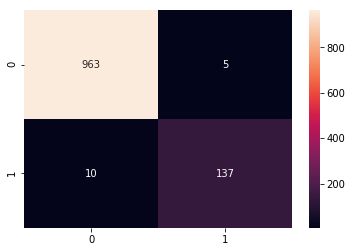

In [104]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

## Accuracy score

In [97]:
accuracy_score(y_test,y_pred)*100

98.65470852017937

# Create BOW (bag of words) using tfidf-Vectorizer

In [105]:
tfidf = TfidfVectorizer()

In [118]:
tf_train = tfidf.fit_transform(X_train[:5])
tf_train

<5x41 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [119]:
tf_train.toarray()

array([[0.33333333, 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.33333333, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.33333333, 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [114]:
tf_train.toarray()[0]

0.0

# Serializing/De-serializing the model

In [122]:
from joblib import dump,load

In [123]:
dump(nb,"nb.joblib")

['nb.joblib']

In [124]:
mod = load("nb.joblib")

In [127]:
y_pred = mod.predict(cv_test_dtm)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [128]:
accuracy_score(y_test,y_pred)*100

98.65470852017937